In [3]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


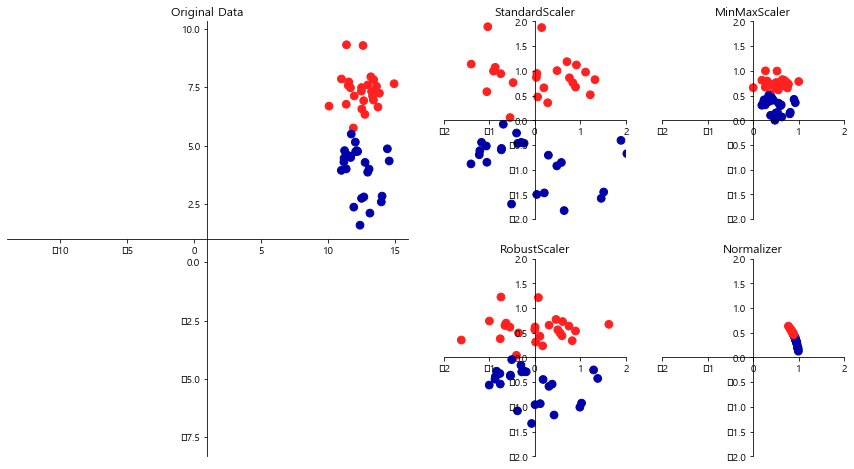

In [4]:
mglearn.plots.plot_scaling()

# 3.3.1 여러 가지 전처리 방법

위 그림의 첫 번째 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋이다. 첫 번째 특성은 10과 15 사이에 있다. 두 번째 특성은 1과 9 사이에 있다. 

오른쪽의 네 그래프는 데이터를 기준이 되는 범위로 변환하는 네 가지 방법을 보여준다. scikit-learn의 **StandaardScaler**는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다((x-xbar)/sigma). 그러나 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지는 않는다. **RobustScaler**는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandaardScaler와 비슷함. 하지만 평균과 분산 대신 중간 값과 사분위 값을 사용한다((x-q2)/(q3-q1)). 이런 방식 때문에 RobustScaler는 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않는다. 이런 이상 데이터를 **이상치**라 하며 다른 스케일 조정 기법에서는 문제가 될 수 있다.

반면에 **MinMaxScaler**는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경한다((x-x.min)/(x.max-x.min)). 2차원 데이터셋일 경우에는 모든 데이터가 x 축의 0과 1, y 축의 0과 1 사이의 사각 영역에 담기게 된다.

마지막으로 **Normalizer**는 매우 다른 스케일 조정 기법이다. 이 방식은 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 다른 말로 하면 지름이 1인 원(3차원일 때는 구)에 데이터 포인트를 투영합니다. 이 말은 각 데이터 포인트가 다른 비율로 스케일이 조정된다는 뜻이다. 이러한 정규화는 특성 벡터의 길이는 상관 없고 데이터의 방향만이 중요할 때 많이 사용한다.

# 3.3.2 데이터 변환 적용하기

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = tts(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


cancer 데이터셋에는 569개의 데이터 포인트가 있고 각 데이터 포인트는 30개의 측정값으로 이뤄져있다. 이 데이터셋에서 훈련셋 426개, 테스트셋 143개를 나눔.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

그런 다음 fit 메서드에 훈련 데이터를 적용한다. MinMaxScaler의 fit 메서드는 훈련셋에 있는 특성마다 최솟값과 최댓값을 계산한다. 2장의 분류 모델이나 회귀 모델과는 달리 스케일 객체는 fit 메서드를 호출할 때 훈련 데이터만 넘겨주며 y_train은 사용하지 않는다.

In [23]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

fit 메서드로 학습한 변환을 적용하려면, 즉 실제로 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용한다. scikit-learn의 transform은 새로운 데이터 표현을 만들 때 사용하는 메서드이다.

In [24]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력한다.
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


변환된 데이터의 배열 크기는 원래 데이터와 동일함. 즉 특성 값이 이동되거나 크기가 조정되었을 뿐이다. 예상대로 모든 특성의 값은 0과 1 사이가 되었다.

이 데이터에 SVM을 적용하려면 테스트셋도 변환해야함. 이땐 X_test를 넣어 transform 메서드를 호출하면 된다.

In [25]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력한다.
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


# 3.3.3 QuantileTransformer와 PowerTransformer

**Quantile Transformer**는 기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다. RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축한다.


In [26]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

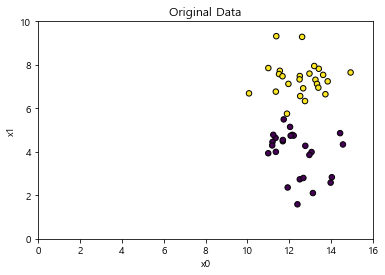

In [27]:
X,y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


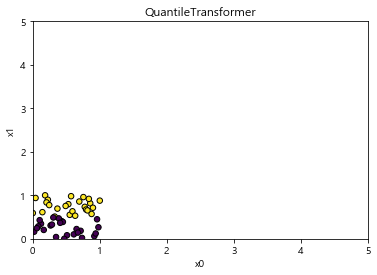

In [28]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1 사이에 고르게 분포되어 있다. 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인할 수 있다.

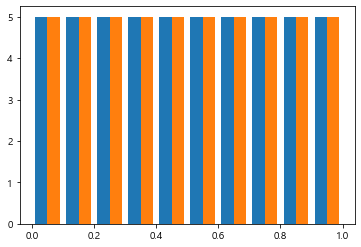

In [29]:
plt.hist(X_trans)
plt.show()

QuantileTransdormer의 분위수는 n_quantiles 매개변수에 설정할 수 있으며 기본값은 1000이다. scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는 (n_quantiles, n_features) 이다.

In [30]:
print(scaler.quantiles_.shape)

(50, 2)


QuantileTransformer의 동작을 조금 더 잘 이해하기 위해서 간단한 샘플 데이터를 만들어 변환 결과를 비교해보자. 아래의 코드에서 하나의 특성과 다섯 개의 샘플로 이루어진 간단한 데이터셋을 만들었다. np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환단다. 여기에는 첫 번쨰, 1사분위, 중간값, 3사분위, 마지막 값을 지정했다. 훈련 샘플이 모두 다섯 개이므로 지정한 분위가 훈련 샘플과 정확히 일치한다.

In [31]:
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0], [0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [32]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:,0], [0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분포가 아니라 정규분포로 출력을 바꿀 수 있다.

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


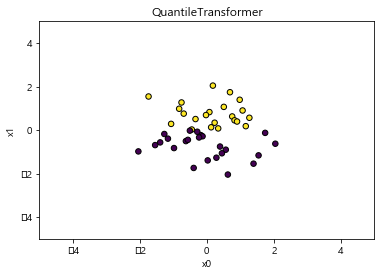

In [33]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5),
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

데이터의 특성별로 정규분포 형태에 가깝도록 변환해주는 PowerTransformer는 method 매개변수에 'yeo-johnson'와 'box-cox' 알고리즘을 지정할 수 있다. 기본값은 'yeo-johnson'이다.

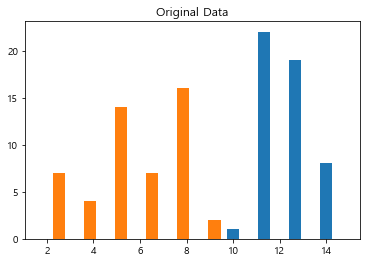

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


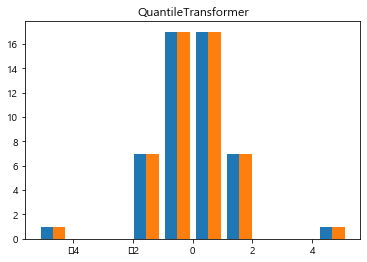

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


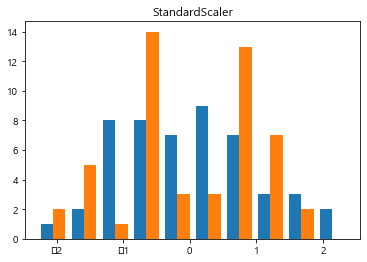

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


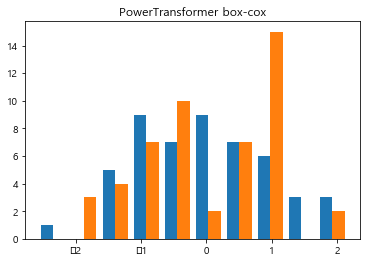

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


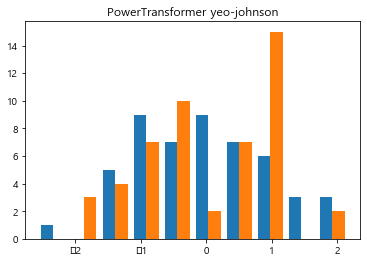

In [34]:
plt.hist(X)
plt.title("Original Data")
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer box-cox")
plt.show()


X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()

위의 예에서는 PowerTransformer의 두 알고리즘이 동일한 결과를 만들었다. 실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어려움. 각 변환기의 결과를 히스터그램으로 확인하는 것이 좋다.

# 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 정용해야 한다는 점이 중요함. 다음 예에서는 이와 반대로, 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 보여준다.

C:\Users\NT500R\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


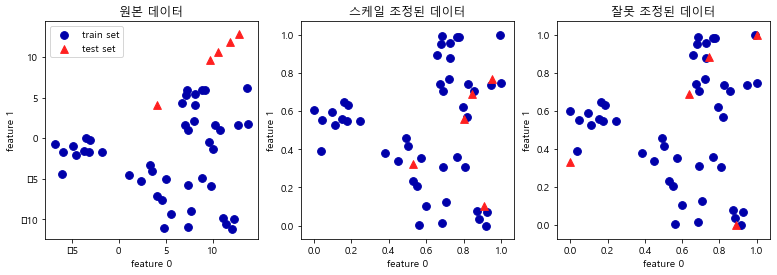

In [39]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test = tts(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그린다.
fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1],
               c=mglearn.cm2.colors[0], label="train set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,0], marker='^',
               c=mglearn.cm2.colors[1], label='test set', s=60)
axes[0].legend(loc='upperleft')
axes[0].set_title("원본 데이터")

# MinMaxScaler 를 사용해 스케일을 조정함.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_t_s = scaler.transform(X_train)
X_te_s = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그린다.
axes[1].scatter(X_t_s[:,0], X_t_s[:,1],
               c=mglearn.cm2.colors[0], label='train set', s=60)
axes[1].scatter(X_te_s[:,0], X_te_s[:,1], marker='^',
               c=mglearn.cm2.colors[1], label='test set', s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정함.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 된다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안된다.
test_s = MinMaxScaler()
test_s.fit(X_test)
X_test_scaled_badly = test_s.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그린다.
axes[2].scatter(X_t_s[:,0], X_t_s[:,1],
               c=mglearn.cm2.colors[0], label='train set', s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^',
               c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

첫 번째 그래프는 2차원 원본 데이터셋이며, 훈련세트는 원으로 표시하고 테스트 세트는 삼각형으로 나타냈다. 두 번째 그래프는 같은 데이터를 MinMaxScaler로 스케일을 조정한 것이다. 훈현 세트를 사용해 fit 메서드를 호출하고 훈련 세트와 테스트 세트에 transform 메서드를 적용함. 축의 눈금이 바뀐 것만 빼면 두 번쨰 그래프는 첫 번째 그래프와 동일하다. 이제 모든 특성은 0과 1 사이에 놓여있다. 하지만 테스트 데이터의 최솟값과 최댓값은 0과 1이 아니다.

세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정했을 때, 무슨 일이 일어나는지 보여준다. 이 경우 훈련 세트와 테스트 세트의 최솟값과 최댓값이 모두 0과 1이다. 하지만 데이터셋이 매우 다르게 보인다. 테스트 포인트는 스케일이 다르게 조정되었기 때문에 훈련 세트와 다른 비율로 이동했다. 따라서 데이터 배열이 뒤죽박죽이 되었다. 다른 방향으로 생각해보면 테스트 세트의 크기가 1인 테스트 세트를 생각해볼 수 있다. 하나의 포인트로는 MinMaxScaler에 필요한 최솟값과 최댓값이 없어 스케일을 조정할 수가 없다. 하지만 테스트 세트의 크기 때문에 작업 과정이 달라져서는 안된다.

단축 메서드와 효율적인 방법

보통 어떤 데이터셋에서 fit을 적용하면 transform을 호출한다. 이는 매우 전형적인 작업이라 fit과 transform을 차례로 호출하는 것보다 효율적인 방법이 필요하다. 이럴 때를 위해 transform 메서드를 가진 모든 모델은 fit_transform 메서드를 제공한다.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝을 사용하여 fit과 transform을 연달아 호출함.
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적이다.
X_scaled_d = scaler.fit_transform(X_train)

# 3.3.5 지도 학습에서 데이터 전처리 효과

In [42]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = tts(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

test set accuracy: 0.63


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

scaled test set accuracy: 0.97


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# 조정된 데이터로 svm 학습
svm.fit(X_train_s,y_train)

# 스케일 조정된 테스트셋의 정확도
print("SVM test accuracy: {:.2f}". format(svm.score(X_test_s, y_test)))

SVM test accuracy: 0.96


앞서 본 것처럼 스케일 조정의 효과는 꽤 크다.